In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

#Datasets and system
import numpy as np                # Management of arrays
import os                         # System utils
import pandas as pd
from pathlib import Path          # path and file utils
from scipy.io import loadmat      # Required to load .mat files
import h5py                       # For creating new dataset files
import sklearn
import copy
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import mannwhitneyu
import seaborn as sns

Mounted at /content/drive


# Load HCP RE data from LOO-CV

In [2]:
HCP_RE=pd.read_csv('***/HCP_RE_LOSO/HCP_RE.csv')
HCP_RE=HCP_RE.drop(HCP_RE.columns[0], axis=1)

In [3]:
atlas_ROI_names=pd.read_csv(os.path.join('/content/drive/MyDrive/PhD/Organized_Inputs', "atlas_ROI_sorted.csv"))
atlas_ROI_names_prefix=copy.deepcopy(atlas_ROI_names)
atlas_ROI_names_prefix.loc[118:169, ('Atlases_sorted')] ='wm_' + atlas_ROI_names.loc[118:169, ('Atlases_sorted')].astype(str)
atlas_ROI_names_prefix.loc[68:117, ('Atlases_sorted')] ='gm_' + atlas_ROI_names.loc[68:117, ('Atlases_sorted')].astype(str)


# Load test set RE data from original model

In [4]:
results_path="***/Original_Results/"

feat_mse_original=pd.read_csv(os.path.join(results_path,'feat_mse_original.csv' ))
feat_mse_original=feat_mse_original.drop(feat_mse_original.columns[0], axis=1)

subj_mse_original=pd.read_csv(os.path.join(results_path,'subj_mse_original.csv' ))
subj_mse_original=subj_mse_original.drop(subj_mse_original.columns[0], axis=1)

In [5]:
BD_RE_original=pd.read_csv(os.path.join(results_path,'BD_RE_original.csv' ))
BD_RE_original=BD_RE_original.drop(BD_RE_original.columns[0], axis=1)

HC_RE_original=pd.read_csv(os.path.join(results_path,'HC_RE_original.csv' ))
HC_RE_original=HC_RE_original.drop(HC_RE_original.columns[0], axis=1)

# Median RE for each ROI: heatmap visualization

**Cortical Thickness**

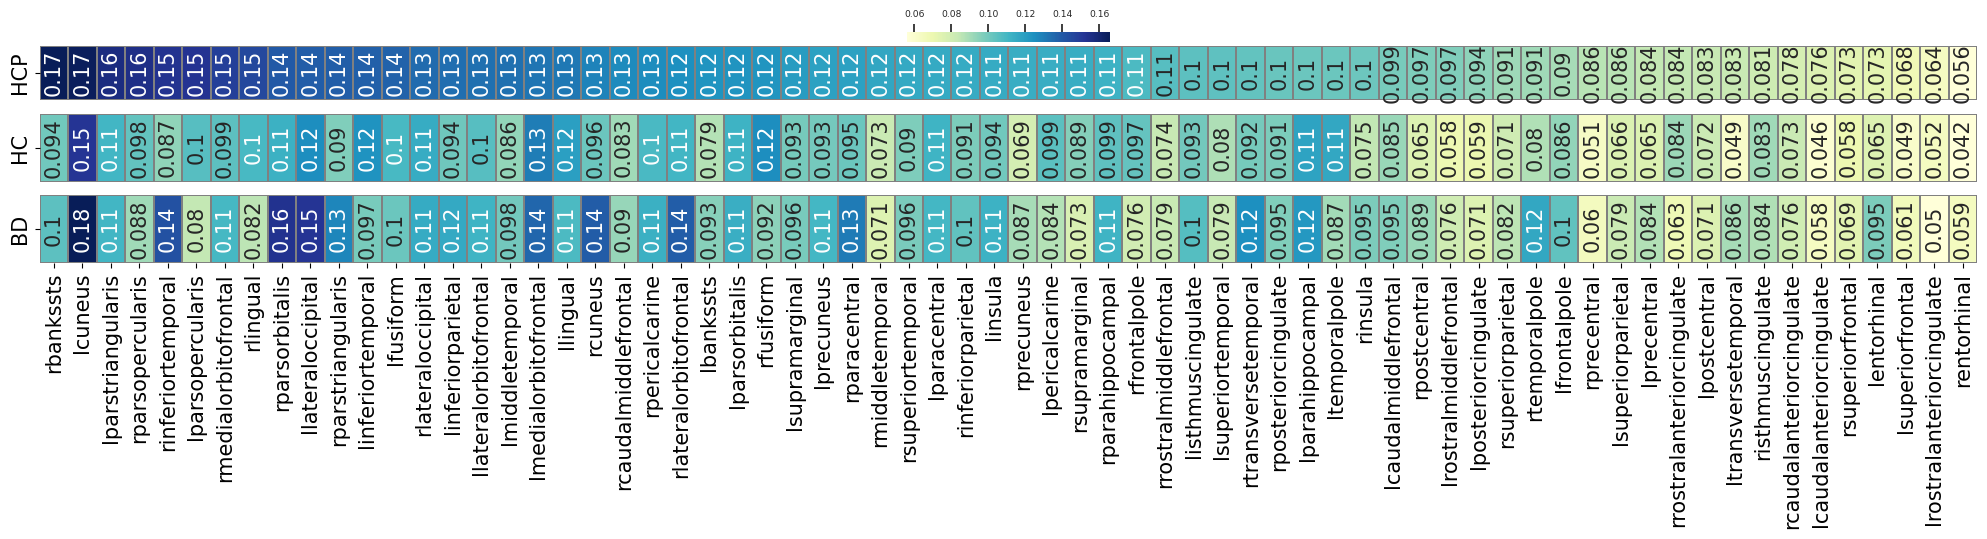

In [6]:

fig, ax1 = plt.subplots( 3,1, figsize = (25,3)) # width x height


HCP_mean_feat_sorted=pd.DataFrame(HCP_RE.median()).T.iloc[:,0:68].sort_values(by=0, axis=1, ascending=False )


x_axis_labels = atlas_ROI_names_prefix.iloc[HCP_mean_feat_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["HCP"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(HCP_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[0], cmap="YlGnBu",
                    cbar_kws={'orientation':'horizontal', 'location':'top'},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

HC_mean_feat_sorted=pd.DataFrame(HC_RE_original.median()).T.iloc[:,HCP_mean_feat_sorted.columns.astype(int)].values

y_axis_labels = ["HC"] # labels for y-axis4

heatmap2=sns.heatmap(HC_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[1], cmap="YlGnBu", cbar=False,vmax=0.17,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)


BD_mean_feat_sorted=pd.DataFrame(BD_RE_original.median()).T.iloc[:,HCP_mean_feat_sorted.columns.astype(int)].values

y_axis_labels = ["BD"] # labels for y-axis4

heatmap2=sns.heatmap(BD_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=x_axis_labels, ax=ax1[2], cmap="YlGnBu", cbar=False, vmax=0.17,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

ax1[2].set_yticklabels(ax1[2].get_yticklabels(), fontsize=15)

# Customize x-axis label font size
ax1[2].set_xticklabels(ax1[2].get_xticklabels(), fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()
# Customize colorbar font size
#cbar = heatmap.collections[0].colorbar
#cbar.ax.tick_params(labelsize=10)  # Set the font size for colorbar labels

**Gray Matter Volumes**

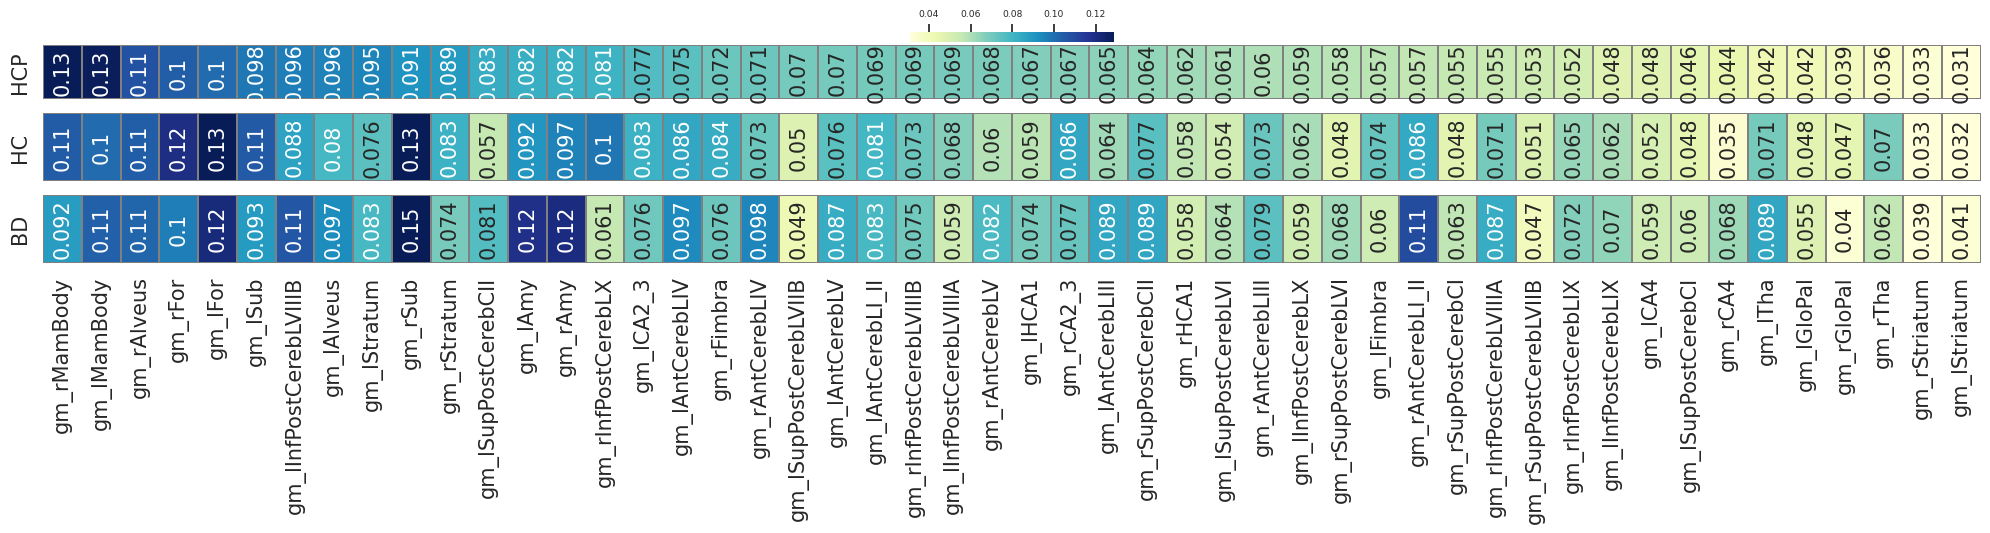

In [7]:

fig, ax1 = plt.subplots( 3,1, figsize = (25,3)) # width x height


HCP_mean_feat_sorted=pd.DataFrame(HCP_RE.median()).T.iloc[:,68:118].sort_values(by=0, axis=1, ascending=False )


x_axis_labels = atlas_ROI_names_prefix.iloc[HCP_mean_feat_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["HCP"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(HCP_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[0], cmap="YlGnBu",
                    cbar_kws={'orientation':'horizontal', 'location':'top'},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

HC_mean_feat_sorted=pd.DataFrame(HC_RE_original.median()).T.iloc[:,HCP_mean_feat_sorted.columns.astype(int)].values

y_axis_labels = ["HC"] # labels for y-axis4

heatmap2=sns.heatmap(HC_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[1], cmap="YlGnBu", cbar=False,vmax=0.13,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)


BD_mean_feat_sorted=pd.DataFrame(BD_RE_original.median()).T.iloc[:,HCP_mean_feat_sorted.columns.astype(int)].values

y_axis_labels = ["BD"] # labels for y-axis4

heatmap2=sns.heatmap(BD_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=x_axis_labels, ax=ax1[2], cmap="YlGnBu", cbar=False, vmax=0.13,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

ax1[2].set_yticklabels(ax1[2].get_yticklabels(), fontsize=15)

# Customize x-axis label font size
ax1[2].set_xticklabels(ax1[2].get_xticklabels(), fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()
# Customize colorbar font size
#cbar = heatmap.collections[0].colorbar
#cbar.ax.tick_params(labelsize=10)  # Set the font size for colorbar labels

**WMV**

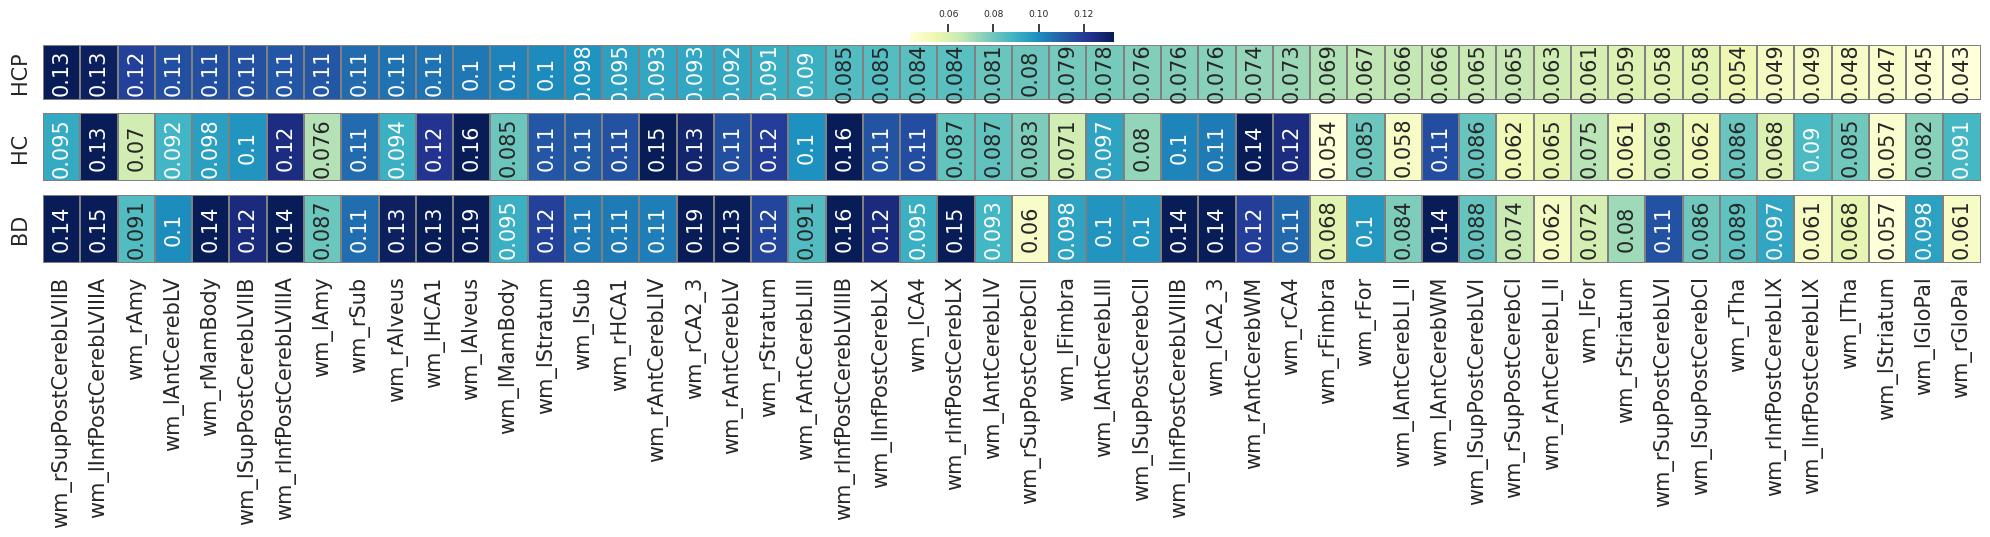

In [8]:

fig, ax1 = plt.subplots( 3,1, figsize = (25,3)) # width x height


HCP_mean_feat_sorted=pd.DataFrame(HCP_RE.median()).T.iloc[:,118:170].sort_values(by=0, axis=1, ascending=False )


x_axis_labels = atlas_ROI_names_prefix.iloc[HCP_mean_feat_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["HCP"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(HCP_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[0], cmap="YlGnBu",
                    cbar_kws={'orientation':'horizontal', 'location':'top'},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

HC_mean_feat_sorted=pd.DataFrame(HC_RE_original.median()).T.iloc[:,HCP_mean_feat_sorted.columns.astype(int)].values

y_axis_labels = ["HC"] # labels for y-axis4

heatmap2=sns.heatmap(HC_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[1], cmap="YlGnBu", cbar=False,vmax=0.13,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)


BD_mean_feat_sorted=pd.DataFrame(BD_RE_original.median()).T.iloc[:,HCP_mean_feat_sorted.columns.astype(int)].values

y_axis_labels = ["BD"] # labels for y-axis4

heatmap2=sns.heatmap(BD_mean_feat_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=x_axis_labels, ax=ax1[2], cmap="YlGnBu", cbar=False, vmax=0.13,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

ax1[2].set_yticklabels(ax1[2].get_yticklabels(), fontsize=15)

# Customize x-axis label font size
ax1[2].set_xticklabels(ax1[2].get_xticklabels(), fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()
# Customize colorbar font size
#cbar = heatmap.collections[0].colorbar
#cbar.ax.tick_params(labelsize=10)  # Set the font size for colorbar labels

# Test set: Heterogeneity MDS patterns

Pairwise differences (subject i - subject j) between deviation scores intra-diagnosis in test set and inter-sets - Si_BD vs Sj_BD  | Si_BD vs. Sj_HC | Sj_HC vs Sj_HC 
Perform the mean and have a measure of heterogeinity/overlapping deviating patterns in BD, HC and between group

## BD subjects average pairwise difference

In [9]:
from scipy.stats import spearmanr
pairs_bd=pd.DataFrame()
pairs_bd_corr=[]
for subj in range(0,len(BD_RE_original)-1): # from 0 to -1
  for subj1 in range(subj+1,len(BD_RE_original)):# from subj to final
    dif=pd.DataFrame(np.abs(BD_RE_original.iloc[subj,:]-BD_RE_original.iloc[subj1,:])).T
    corr=spearmanr(BD_RE_original.iloc[subj,:],-BD_RE_original.iloc[subj1,:])
    pairs_bd=pd.concat([pairs_bd, dif], ignore_index=True)
    pairs_bd_corr.append(corr)

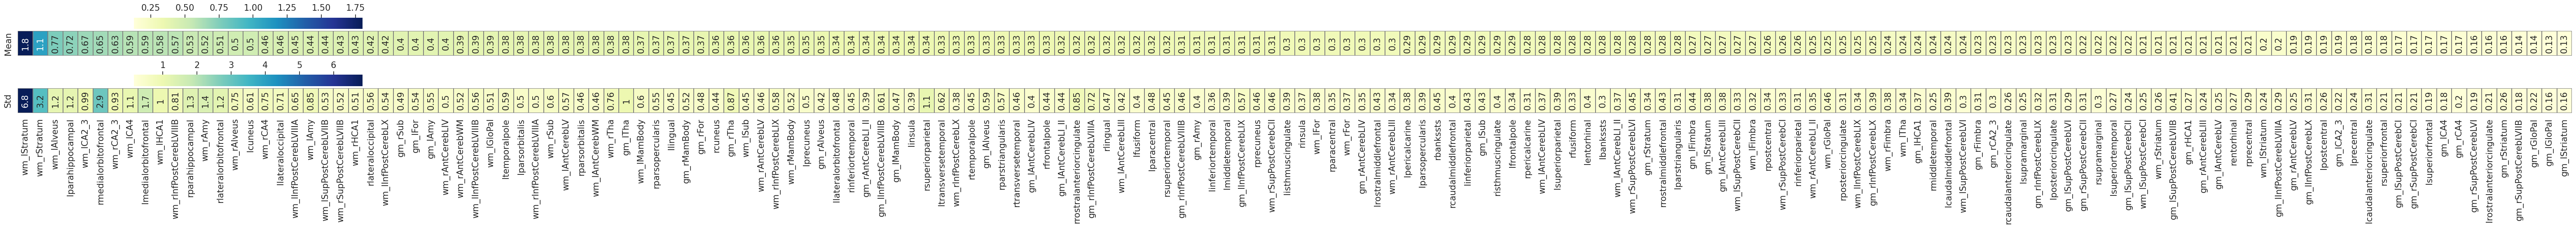

In [10]:
pairwise_mean=pd.DataFrame(pairs_bd.mean(axis=0).values).transpose()
fig, ax1 = plt.subplots( 2,1, figsize = (80,3)) # width x height
#ax1 = fig.add_subplot(1, 1, 1) # row, column, position

pairwise_mean_sorted=pairwise_mean.sort_values(by=0, axis=1, ascending=False )

x_axis_labels = atlas_ROI_names_prefix.iloc[pairwise_mean_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["Mean"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(pairwise_mean_sorted, annot=True, yticklabels=y_axis_labels,
                     xticklabels=[], ax=ax1[0], cmap="YlGnBu",
                    cbar_kws={'orientation':'horizontal', 'location':'top', 'fraction':0.3, 'anchor':(0.05,1)},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

# Customize x-axis label font size
#ax1[0].set_xticklabels(ax1[0].get_xticklabels(), fontsize=10)
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap1.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)


#ax2 = fig.add_subplot(3, 1, 2) # row, column, position

pairwise_std=pd.DataFrame(pairs_bd.std(axis=0).values).transpose()
pairwise_std_sorted=pairwise_std.iloc[:,pairwise_mean_sorted.columns.astype(int)]#sort_values(by=0, axis=1, ascending=True )

x_axis_labels = atlas_ROI_names_prefix.iloc[pairwise_mean_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["Std"] # labels for y-axis4
sns.set(font_scale=0.6, )

heatmap2=sns.heatmap(pairwise_std_sorted, annot=True, yticklabels=y_axis_labels,
                     xticklabels=x_axis_labels, ax=ax1[1],cmap="YlGnBu",
                     cbar_kws={'orientation':'horizontal', 'location':'top', 'fraction':0.3, 'anchor':(0.05,1)},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

# Customize x-axis label font size
ax1[1].set_xticklabels(ax1[1].get_xticklabels(), fontsize=15)
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap2.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.5)
#plt.subplot_tool()

plt.show()

## HC subjects average pairwise difference

In [11]:
pairs_hc=pd.DataFrame()
pairs_hc_corr=[]
for subj in range(0,len(HC_RE_original)-1): # from 0 to -1
  for subj1 in range(subj+1,len(HC_RE_original)):# from subj to final
    dif=pd.DataFrame(np.abs(HC_RE_original.iloc[subj,:]-HC_RE_original.iloc[subj1,:])).T
    corr=spearmanr(HC_RE_original.iloc[subj,:],HC_RE_original.iloc[subj1,:])
    pairs_hc=pd.concat([pairs_hc, dif], ignore_index=True)
    pairs_hc_corr.append(corr)

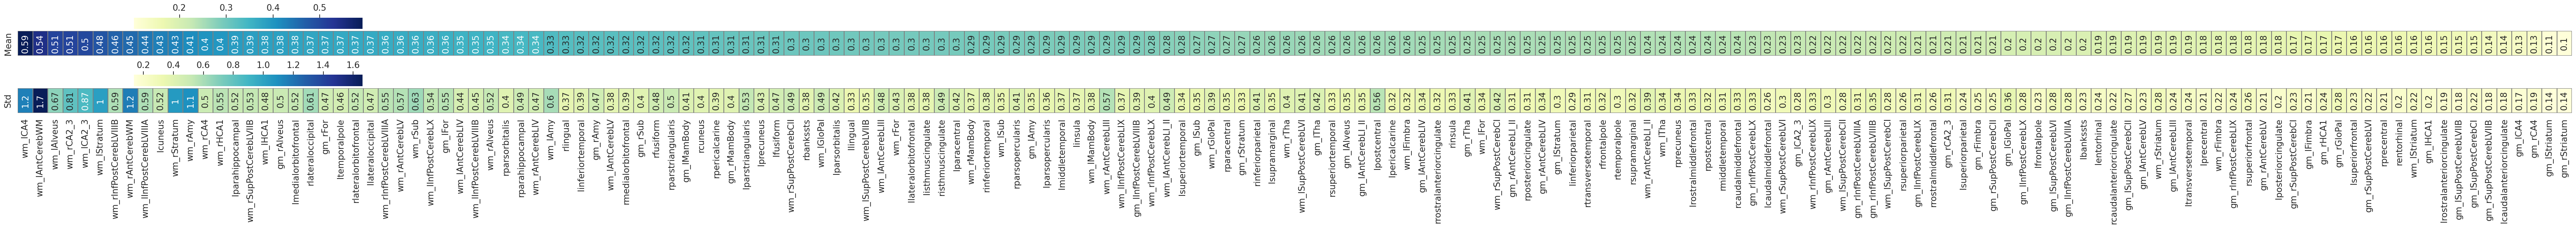

In [12]:
pairwise_mean=pd.DataFrame(pairs_hc.mean(axis=0).values).transpose()
fig, ax1 = plt.subplots( 2,1, figsize = (80,3)) # width x height
#ax1 = fig.add_subplot(1, 1, 1) # row, column, position

pairwise_mean_sorted=pairwise_mean.sort_values(by=0, axis=1, ascending=False )

x_axis_labels = atlas_ROI_names_prefix.iloc[pairwise_mean_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["Mean"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(pairwise_mean_sorted, annot=True, yticklabels=y_axis_labels,
                     xticklabels=[], ax=ax1[0], cmap="YlGnBu",
                    cbar_kws={'orientation':'horizontal', 'location':'top', 'fraction':0.3, 'anchor':(0.05,1)},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

# Customize x-axis label font size
#ax1[0].set_xticklabels(ax1[0].get_xticklabels(), fontsize=10)
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap1.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)


#ax2 = fig.add_subplot(3, 1, 2) # row, column, position

pairwise_std=pd.DataFrame(pairs_hc.std(axis=0).values).transpose()
pairwise_std_sorted=pairwise_std.iloc[:,pairwise_mean_sorted.columns.astype(int)]#sort_values(by=0, axis=1, ascending=True )

x_axis_labels = atlas_ROI_names_prefix.iloc[pairwise_mean_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["Std"] # labels for y-axis4
sns.set(font_scale=0.6, )

heatmap2=sns.heatmap(pairwise_std_sorted, annot=True, yticklabels=y_axis_labels,
                     xticklabels=x_axis_labels, ax=ax1[1],cmap="YlGnBu",
                     cbar_kws={'orientation':'horizontal', 'location':'top', 'fraction':0.3, 'anchor':(0.05,1)},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

# Customize x-axis label font size
ax1[1].set_xticklabels(ax1[1].get_xticklabels(), fontsize=15)
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap2.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.5)
#plt.subplot_tool()

plt.show()

## BD vs. HC average pairwise difference

In [13]:
#HC vs BD

from scipy.stats import spearmanr

pairs_dif=pd.DataFrame()
pairs_dif_corr=[]
for subj in range(0,len(HC_RE_original)): # from 0 to -1
  for subj1 in range(0,len(BD_RE_original)):# from subj to final
    dif=pd.DataFrame(np.abs(HC_RE_original.iloc[subj,:]-BD_RE_original.iloc[subj1,:])).T
    corr=spearmanr(HC_RE_original.iloc[subj,:],BD_RE_original.iloc[subj1,:])
    pairs_dif=pd.concat([pairs_dif, dif], ignore_index=True)
    pairs_dif_corr.append(corr)

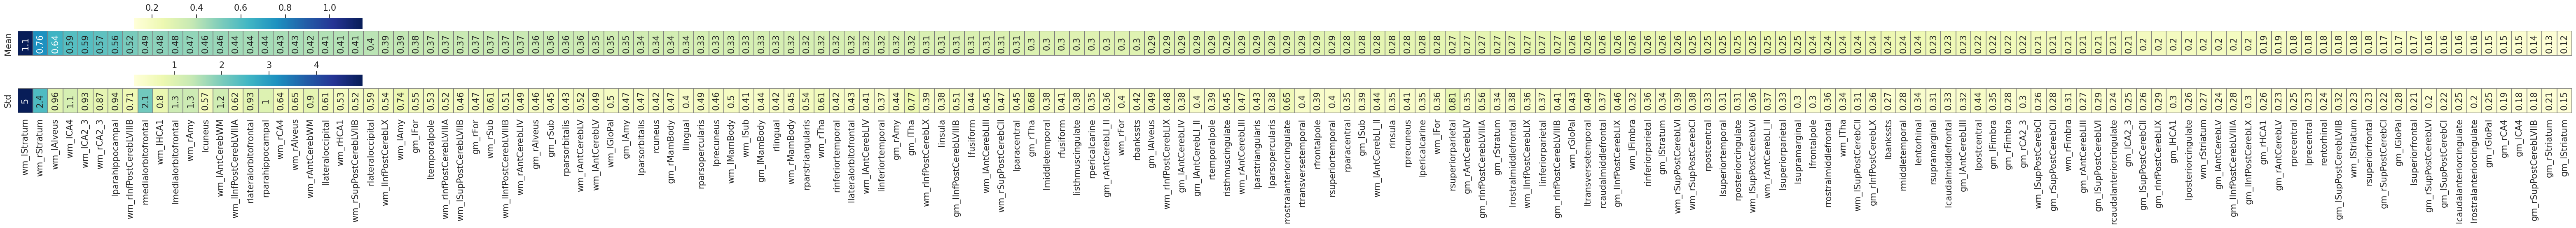

In [14]:
pairwise_mean=pd.DataFrame(pairs_dif.mean(axis=0).values).transpose()
fig, ax1 = plt.subplots( 2,1, figsize = (80,3)) # width x height
#ax1 = fig.add_subplot(1, 1, 1) # row, column, position

pairwise_mean_sorted=pairwise_mean.sort_values(by=0, axis=1, ascending=False )

x_axis_labels = atlas_ROI_names_prefix.iloc[pairwise_mean_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["Mean"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(pairwise_mean_sorted, annot=True, yticklabels=y_axis_labels,
                     xticklabels=[], ax=ax1[0], cmap="YlGnBu",
                    cbar_kws={'orientation':'horizontal', 'location':'top', 'fraction':0.3, 'anchor':(0.05,1)},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

# Customize x-axis label font size
#ax1[0].set_xticklabels(ax1[0].get_xticklabels(), fontsize=10)
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap1.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)


#ax2 = fig.add_subplot(3, 1, 2) # row, column, position

pairwise_std=pd.DataFrame(pairs_dif.std(axis=0).values).transpose()
pairwise_std_sorted=pairwise_std.iloc[:,pairwise_mean_sorted.columns.astype(int)]#sort_values(by=0, axis=1, ascending=True )

x_axis_labels = atlas_ROI_names_prefix.iloc[pairwise_mean_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["Std"] # labels for y-axis4
sns.set(font_scale=0.6, )

heatmap2=sns.heatmap(pairwise_std_sorted, annot=True, yticklabels=y_axis_labels,
                     xticklabels=x_axis_labels, ax=ax1[1],cmap="YlGnBu",
                     cbar_kws={'orientation':'horizontal', 'location':'top', 'fraction':0.3, 'anchor':(0.05,1)},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

# Customize x-axis label font size
ax1[1].set_xticklabels(ax1[1].get_xticklabels(), fontsize=15)
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap2.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.5)
#plt.subplot_tool()

plt.show()

## permutation test

Permutation test for BD vs. HC pairwise difference

Shuffle the HC and BD subjects and then iterate the pairwise difference as if the subjects belong to those 2 groups mean of all (HC_RE- BD_RE). The permutation pvalue will be the frequency for which the permutation difference is bigger than the real one ( we are looking for features expressing higher differences in terms of RE patterns between the 2 groups, thus we want to see which differences were significant)

In [ ]:
import time

bd_mean_map=BD_RE_original
hc_mean_map=HC_RE_original
all_mean_map=np.concatenate((np.array(HC_RE_original),np.array(BD_RE_original)))
mean_dif_map_perm= pd.DataFrame()
perm_iter=1000

n_HC=len(HC_RE_original)

for i in range(0,perm_iter):
  start = time.time()
  print('permutation {} '.format(str(i+1)))
  data_shuffled = np.random.permutation(all_mean_map)
  hc_mean_map_perm = data_shuffled[:n_HC]
  bd_mean_map_perm = data_shuffled[n_HC:]

  pairs_dif=pd.DataFrame()
  for subj in range(0,len(HC_RE_original)): # from 0 to -1
    for subj1 in range(0,len(BD_RE_original)):# from subj to final
      dif=pd.DataFrame(np.abs(HC_RE_original.iloc[subj,:]-BD_RE_original.iloc[subj1,:])).T
      pairs_dif=pd.concat([pairs_dif, dif], ignore_index=True)

  mean_dif_map_perm= pd.concat([mean_dif_map_perm,pd.DataFrame(pairs_dif.mean(axis=0).values)], axis=1)
  end = time.time()
  print('time {}'.format(end-start))

perm_based_pvalue_map=np.sum(np.abs(mean_dif_map_perm)>np.abs(mean_dif_dev_map.values.T), axis=1)/perm_iter


In [ ]:
perm_based_pvalue_map=np.sum(np.abs(mean_dif_map_perm)>np.abs(mean_dif_dev_map.values.T), axis=1)/perm_iter
fig = plt.figure(figsize = (80,3)) # width x height

ax1 = fig.add_subplot(1, 1, 1) # row, column, position
pvalue_dif_mean_perm=pd.DataFrame(perm_based_pvalue_map).T

pvalue_dif_mean_perm_sorted=pvalue_dif_mean_perm.sort_values(by=0, axis=1, ascending=True )

x_axis_labels = atlas_ROI_names_prefix.iloc[pvalue_dif_mean_perm_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["Mean"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(pvalue_dif_mean_perm_sorted, annot=True, yticklabels=y_axis_labels, xticklabels=x_axis_labels, ax=ax1, cmap="YlGnBu", linewidths=0.1, linecolor='gray')

# Customize x-axis label font size
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=10)

# Customize colorbar font size
cbar = heatmap1.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.show()

# Extreme values RE distributions

HCP training set

In [18]:
# Feature-wise
HCP_mean_feat_EVD=[]
regions_EVD=[]
n_feat=HCP_RE.columns
n_subj=HCP_RE.index
for i in n_feat:
  thr=np.percentile(HCP_RE.loc[:, i].values, 99)
  id=np.where(HCP_RE.loc[:,i]>thr)
  HCP_mean_feat_EVD.append(np.mean(HCP_RE.loc[id[0],i]))

In [19]:
# Subject-wise
HCP_mean_subj_EVD=[]
n_feat=HCP_RE.columns
n_subj=HCP_RE.index
for i in n_subj:
  thr=np.percentile(HCP_RE.iloc[ i,:].values, 99)
  id=np.where(HCP_RE.iloc[i,:]>thr)
  regions_EVD.append(id[0])
  HCP_mean_subj_EVD.append(np.mean(HCP_RE.iloc[i,id[0]]))

*** test set

HC

In [20]:
# Feature-wise
HC_mean_feat_EVD=[]
regions_EVD=[]
n_feat=HC_RE_original.columns
n_subj=HC_RE_original.index
for i in n_feat:
  thr=np.percentile(HC_RE_original.loc[:, i].values, 99)
  id=np.where(HC_RE_original.loc[:,i]>thr)
  HC_mean_feat_EVD.append(np.mean(HC_RE_original.loc[id[0],i]))

In [21]:
# Subject-wise
HC_mean_subj_EVD=[]
n_feat=HC_RE_original.columns
n_subj=HC_RE_original.index
for i in n_subj:
  thr=np.percentile(HC_RE_original.iloc[i, :].values, 99)
  id=np.where(HC_RE_original.iloc[i,:]>thr)
  regions_EVD.append(id[0])
  HC_mean_subj_EVD.append(np.mean(HC_RE_original.iloc[i,id[0]]))

BD

In [22]:
# Feature-wise
BD_mean_feat_EVD=[]
regions_EVD=[]
n_feat=BD_RE_original.columns
n_subj=BD_RE_original.index
for i in n_feat:
  thr=np.percentile(BD_RE_original.loc[:, i].values, 99)
  id=np.where(BD_RE_original.loc[:,i]>thr)
  BD_mean_feat_EVD.append(np.mean(BD_RE_original.loc[id[0],i]))


In [23]:
# Subject-wise
BD_mean_subj_EVD=[]
n_feat=BD_RE_original.columns
n_subj=BD_RE_original.index
for i in n_subj:
  thr=np.percentile(BD_RE_original.iloc[i, :].values, 99)
  id=np.where(BD_RE_original.iloc[i,:]>thr)
  regions_EVD.append(id[0])
  BD_mean_subj_EVD.append(np.mean(BD_RE_original.iloc[i,id[0]]))


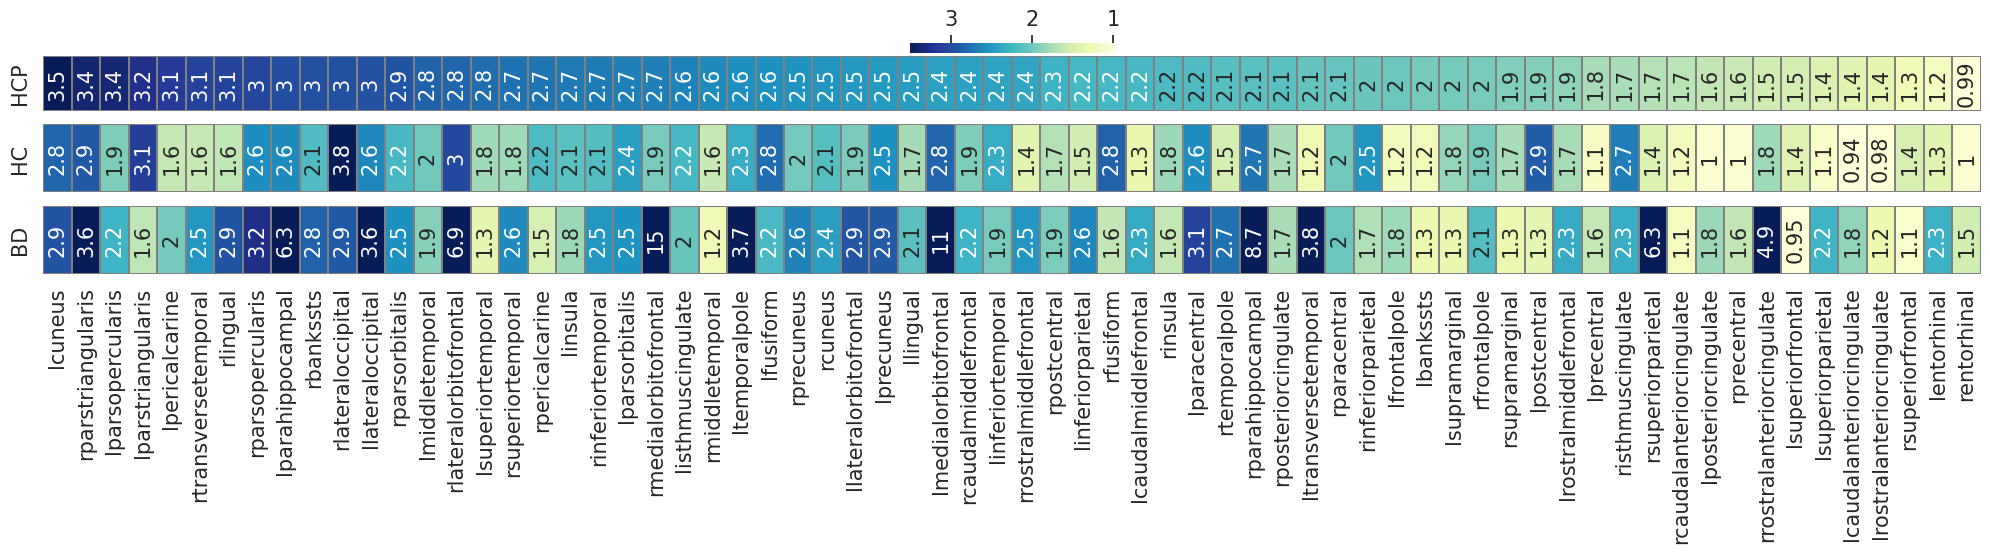

In [24]:

fig, ax1 = plt.subplots( 3,1, figsize = (25,3)) # width x height


HCP_mean_feat_EVD_sorted=pd.DataFrame(HCP_mean_feat_EVD).T.iloc[:,:68].sort_values(by=0, axis=1, ascending=False )

x_axis_labels = atlas_ROI_names_prefix.iloc[HCP_mean_feat_EVD_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["HCP"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(HCP_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[0], cmap="YlGnBu", vmax=3.5,
                    cbar_kws={'orientation':'horizontal', 'location':'top'},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

HC_mean_feat_EVD_sorted=pd.DataFrame(HC_mean_feat_EVD).T.iloc[:,HCP_mean_feat_EVD_sorted.columns.astype(int)].values

y_axis_labels = ["HC"] # labels for y-axis4

heatmap2=sns.heatmap(HC_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[1], cmap="YlGnBu", cbar=False,vmax=3.5,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)


BD_mean_feat_EVD_sorted=pd.DataFrame(BD_mean_feat_EVD).T.iloc[:,HCP_mean_feat_EVD_sorted.columns.astype(int)].values

y_axis_labels = ["BD"] # labels for y-axis4

heatmap2=sns.heatmap(BD_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=x_axis_labels, ax=ax1[2], cmap="YlGnBu", cbar=False, vmax=3.5,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

ax1[2].set_yticklabels(ax1[2].get_yticklabels(), fontsize=15)

# Customize x-axis label font size
ax1[2].set_xticklabels(ax1[2].get_xticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap1.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)  # Set the font size for colorbar labels
cbar.ax.invert_xaxis()

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()


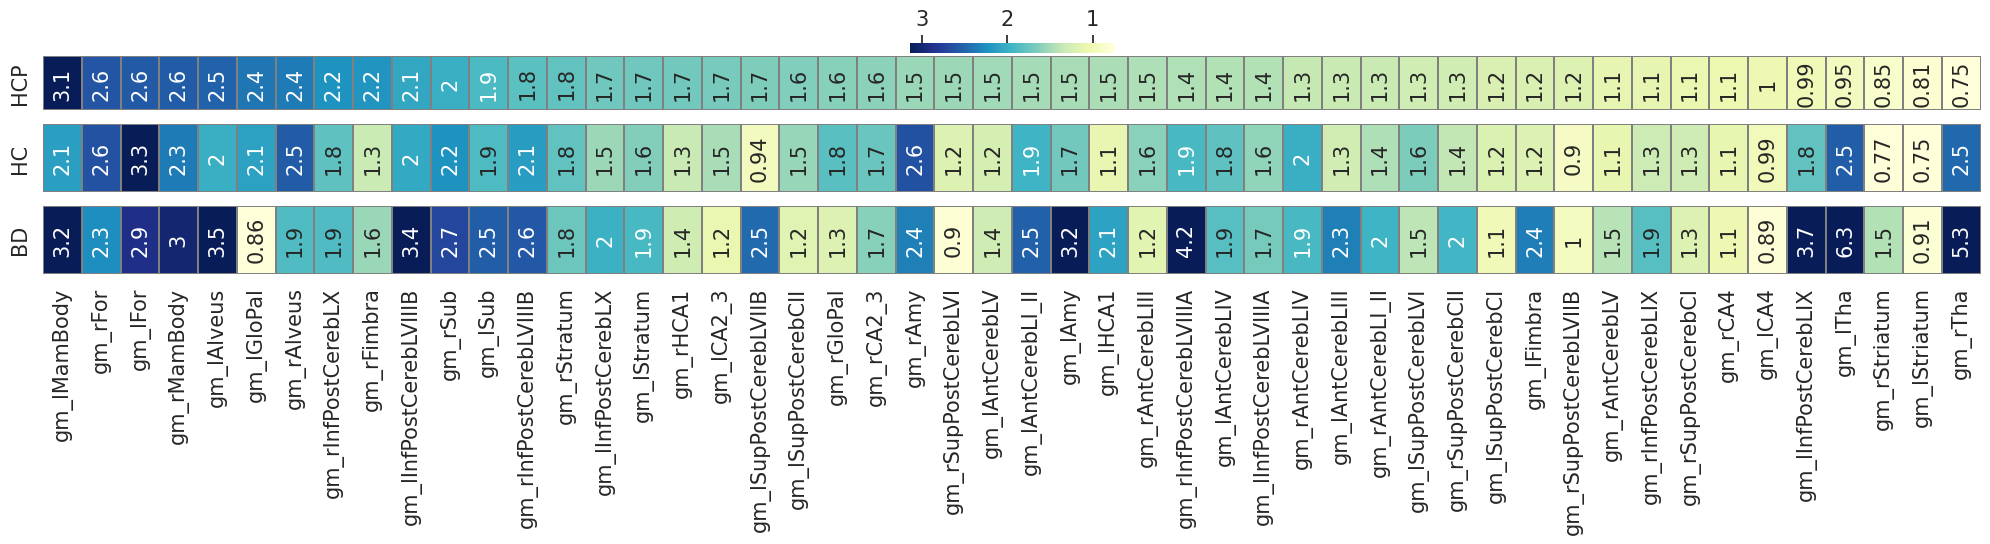

In [25]:

fig, ax1 = plt.subplots( 3,1, figsize = (25,3)) # width x height


HCP_mean_feat_EVD_sorted=pd.DataFrame(HCP_mean_feat_EVD).T.iloc[:,68:118].sort_values(by=0, axis=1, ascending=False )

x_axis_labels = atlas_ROI_names_prefix.iloc[HCP_mean_feat_EVD_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["HCP"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(HCP_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[0], cmap="YlGnBu",
                    cbar_kws={'orientation':'horizontal', 'location':'top'},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

HC_mean_feat_EVD_sorted=pd.DataFrame(HC_mean_feat_EVD).T.iloc[:,HCP_mean_feat_EVD_sorted.columns.astype(int)].values

y_axis_labels = ["HC"] # labels for y-axis4

heatmap2=sns.heatmap(HC_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[1], cmap="YlGnBu", cbar=False,vmax=3.1,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)


BD_mean_feat_EVD_sorted=pd.DataFrame(BD_mean_feat_EVD).T.iloc[:,HCP_mean_feat_EVD_sorted.columns.astype(int)].values

y_axis_labels = ["BD"] # labels for y-axis4

heatmap2=sns.heatmap(BD_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=x_axis_labels, ax=ax1[2], cmap="YlGnBu", cbar=False, vmax=3.1,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

ax1[2].set_yticklabels(ax1[2].get_yticklabels(), fontsize=15)

# Customize x-axis label font size
ax1[2].set_xticklabels(ax1[2].get_xticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap1.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)  # Set the font size for colorbar labels
cbar.ax.invert_xaxis()
plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()


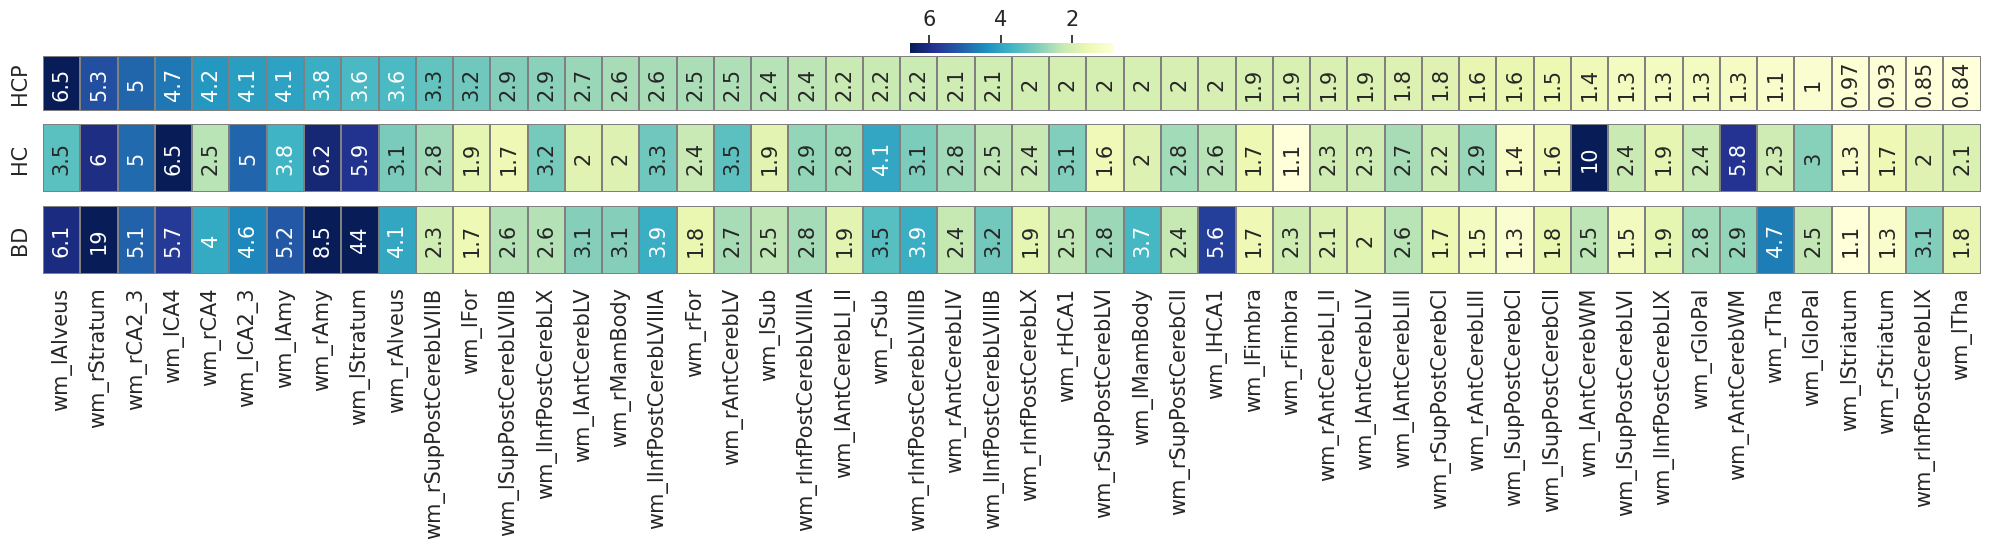

In [26]:

fig, ax1 = plt.subplots( 3,1, figsize = (25,3)) # width x height


HCP_mean_feat_EVD_sorted=pd.DataFrame(HCP_mean_feat_EVD).T.iloc[:,118:170].sort_values(by=0, axis=1, ascending=False )

x_axis_labels = atlas_ROI_names_prefix.iloc[HCP_mean_feat_EVD_sorted.columns.astype(int),0].values# labels for x-axis
y_axis_labels = ["HCP"] # labels for y-axis4
sns.set(font_scale=0.6, )
heatmap1=sns.heatmap(HCP_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[0], cmap="YlGnBu",
                    cbar_kws={'orientation':'horizontal', 'location':'top'},
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[0].set_yticklabels(ax1[0].get_yticklabels(), fontsize=15)

HC_mean_feat_EVD_sorted=pd.DataFrame(HC_mean_feat_EVD).T.iloc[:,HCP_mean_feat_EVD_sorted.columns.astype(int)].values

y_axis_labels = ["HC"] # labels for y-axis4

heatmap2=sns.heatmap(HC_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=[], ax=ax1[1], cmap="YlGnBu", cbar=False,vmax=6.5,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})
ax1[1].set_yticklabels(ax1[1].get_yticklabels(), fontsize=15)


BD_mean_feat_EVD_sorted=pd.DataFrame(BD_mean_feat_EVD).T.iloc[:,HCP_mean_feat_EVD_sorted.columns.astype(int)].values

y_axis_labels = ["BD"] # labels for y-axis4

heatmap2=sns.heatmap(BD_mean_feat_EVD_sorted, annot=True, yticklabels=y_axis_labels,
                    xticklabels=x_axis_labels, ax=ax1[2], cmap="YlGnBu", cbar=False, vmax=6.5,
                    linewidths=0.1, linecolor='gray', annot_kws={'rotation': 90, 'fontsize':15})

ax1[2].set_yticklabels(ax1[2].get_yticklabels(), fontsize=15)

# Customize x-axis label font size
ax1[2].set_xticklabels(ax1[2].get_xticklabels(), fontsize=15)

# Customize colorbar font size
cbar = heatmap1.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)  # Set the font size for colorbar labels
cbar.ax.invert_xaxis()

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()
